In [281]:
# importing essential packages
import numpy as np
import os
import sys
from sympy import *
from sympy.physics.quantum import TensorProduct
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, Concatenate, Lambda

In [283]:
#para_a = np.array([0.5]) #a np.linspace(0.0,0.5,25)
#para_b = np.array([0.0]) #b
para_w = np.array([0.575]) #w np.array([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
para_u = np.array([0.850]) #u
v = 1

In [285]:
v,u,w = symbols('v u w')
#aval = para_a[0]
#bval = para_b[0]

pval = 0.5
rval = 0.5-pval
qval = 0.5
sval = 0.0
M1 = v*Matrix([[pval,0,0,qval],[0,rval,sval,0],[0,sval,rval,0],[qval,0,0,pval]])+(1-v)*Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])*(1/4)

pval = 0.5
rval = 0.5-pval
qval = 0.0
sval = 0.0
M2 = v*Matrix([[pval,0,0,qval],[0,rval,sval,0],[0,sval,rval,0],[qval,0,0,pval]])+(1-v)*Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])*(1/4)

pval = 0.25
rval = 0.5-pval
qval = 0.0
sval = 0.0
M3 = v*Matrix([[pval,0,0,qval],[0,rval,sval,0],[0,sval,rval,0],[qval,0,0,pval]])+(1-v)*Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])*(1/4)

In [287]:
M1.subs(v,1)

Matrix([
[0.5, 0, 0, 0.5],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[0.5, 0, 0, 0.5]])

In [289]:
M2.subs(v,1)

Matrix([
[0.5, 0, 0,   0],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[  0, 0, 0, 0.5]])

In [291]:
M3.subs(v,1)

Matrix([
[0.25,    0,    0,    0],
[   0, 0.25,    0,    0],
[   0,    0, 0.25,    0],
[   0,    0,    0, 0.25]])

In [293]:
MMM1 = TensorProduct(TensorProduct(M1,M1),M1)
MMM2 = TensorProduct(TensorProduct(M2,M2),M2)
MMM3 = TensorProduct(TensorProduct(M3,M3),M3)

def TriBasisCorr(MMM):
    MT = zeros(64,64)
    # Since we are using Triangle network we have to make certain changes due to constraints
    for i in range(64):
        for j in range(64):
            si = "{0:06b}".format(i)
            sj = "{0:06b}".format(j)
            '''
            listsi = list(si)
            listsi[4] = list(si)[5]
            listsi[2] = list(si)[0]
            listsi[0] = list(si)[1]
            listsi[1] = list(si)[2]
            listsi[5] = list(si)[3]
            listsi[3] = list(si)[4]

            listsj = list(sj)
            listsj[4] = list(sj)[5]
            listsj[2] = list(sj)[0]
            listsj[0] = list(sj)[1]
            listsj[1] = list(sj)[2]
            listsj[5] = list(sj)[3]
            listsj[3] = list(sj)[4]
            '''  
            listsi = list(si)
            listsi[1] = list(si)[0]
            listsi[2] = list(si)[1]
            listsi[3] = list(si)[2]
            listsi[4] = list(si)[3]
            listsi[5] = list(si)[4]
            listsi[0] = list(si)[5]

            listsj = list(sj)
            listsj[1] = list(sj)[0]
            listsj[2] = list(sj)[1]
            listsj[3] = list(sj)[2]
            listsj[4] = list(sj)[3]
            listsj[5] = list(sj)[4]
            listsj[0] = list(sj)[5]    

            MT[int(''.join(listsi),2),int(''.join(listsj),2)] = MMM[i,j]
    return MT

MT1 = TriBasisCorr(MMM1)
MT2 = TriBasisCorr(MMM2)
MT3 = TriBasisCorr(MMM3)

# This is the Renou measurement setting when used give the Renou distribution
Ma = Matrix([[0,sqrt(1-w*w),-w,0]])
Mb = Matrix([[0,w,sqrt(1-w*w),0]])
Mc = Matrix([[u,0,0,sqrt(1-u*u)]])
Md = Matrix([[sqrt(1-u*u),0,0,-u]])
Mat = Matrix([0,sqrt(1-w*w),-w,0])
Mbt = Matrix([0,w,sqrt(1-w*w),0])
Mct = Matrix([u,0,0,sqrt(1-u*u)])
Mdt = Matrix([sqrt(1-u*u),0,0,-u])


Mabcd = [Ma,Mb,Mc,Md]
MTabcd = [Mat,Mbt,Mct,Mdt]

In [295]:
#MT3.subs(v,1)

In [297]:
MTabcd[0]*Mabcd[0]

Matrix([
[0,                 0,                 0, 0],
[0,          1 - w**2, -w*sqrt(1 - w**2), 0],
[0, -w*sqrt(1 - w**2),              w**2, 0],
[0,                 0,                 0, 0]])

In [299]:
MTabcd[1]*Mabcd[1]

Matrix([
[0,                0,                0, 0],
[0,             w**2, w*sqrt(1 - w**2), 0],
[0, w*sqrt(1 - w**2),         1 - w**2, 0],
[0,                0,                0, 0]])

In [301]:
MTabcd[2]*Mabcd[2]

Matrix([
[            u**2, 0, 0, u*sqrt(1 - u**2)],
[               0, 0, 0,                0],
[               0, 0, 0,                0],
[u*sqrt(1 - u**2), 0, 0,         1 - u**2]])

In [303]:
MTabcd[3]*Mabcd[3]

Matrix([
[         1 - u**2, 0, 0, -u*sqrt(1 - u**2)],
[                0, 0, 0,                 0],
[                0, 0, 0,                 0],
[-u*sqrt(1 - u**2), 0, 0,              u**2]])

In [345]:
def distribution_gen(MT,parameter1, parameter2, parameter3):
    """ parameter1 is usually a parameter of distribution (not always relevant). parameter2 is usually noise."""


    """ Info: If param_c >~ 0.886 or <~0.464, there is no classical 3-local model."""
    """ In terms of c**2: above 0.785 or below 0.215 no classical 3-local model."""
        
    MeasRes = []
    for i in range(4):
        for j in range(4):
            for k in range(4):
                Proj = TensorProduct(TensorProduct(MTabcd[i]*Mabcd[i],MTabcd[j]*Mabcd[j]),MTabcd[k]*Mabcd[k])
                Meas = np.trace(Proj*MT)
                #print(Meas)
            
                Meas = Meas.subs(u,parameter1)
                Meas = Meas.subs(v,parameter2)
                Meas = Meas.subs(w,parameter3)
                MeasStr = str(Meas)
                MeasStr = MeasStr.replace('Matrix([[','')
                MeasStr = MeasStr.replace(']])','')
            
            
                MeasRes.append(MeasStr)
            

    for x in range(64):
        MeasRes[x] = float(MeasRes[x])
        
    MeasArr = np.array(MeasRes)
        
    p = MeasArr

    return p

In [347]:
distribution_gen(MT3,0.85, 1, 0.55)#(u,v,w)

array([0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625])

In [348]:
distribution_gen(MT2,0.85, 1, 0.55)#(u,v,w)

array([0.        , 0.        , 0.02637422, 0.02637422, 0.        ,
       0.        , 0.04711172, 0.02513984, 0.02637422, 0.02513984,
       0.        , 0.        , 0.02637422, 0.04711172, 0.        ,
       0.        , 0.        , 0.        , 0.02513984, 0.04711172,
       0.        , 0.        , 0.02637422, 0.02637422, 0.04711172,
       0.02637422, 0.        , 0.        , 0.02513984, 0.02637422,
       0.        , 0.        , 0.02637422, 0.04711172, 0.        ,
       0.        , 0.02513984, 0.02637422, 0.        , 0.        ,
       0.        , 0.        , 0.04981484, 0.02506172, 0.        ,
       0.        , 0.02506172, 0.02506172, 0.02637422, 0.02513984,
       0.        , 0.        , 0.04711172, 0.02637422, 0.        ,
       0.        , 0.        , 0.        , 0.02506172, 0.02506172,
       0.        , 0.        , 0.02506172, 0.04981484])

In [349]:
distribution_gen(MT1,0.85, 1, 0.55)#(u,v,w)

array([0.        , 0.        , 0.04999314, 0.0027553 , 0.        ,
       0.        , 0.0234928 , 0.04875876, 0.04999314, 0.00152092,
       0.        , 0.        , 0.0027553 , 0.07073064, 0.        ,
       0.        , 0.        , 0.        , 0.00152092, 0.07073064,
       0.        , 0.        , 0.04999314, 0.0027553 , 0.0234928 ,
       0.04999314, 0.        , 0.        , 0.04875876, 0.0027553 ,
       0.        , 0.        , 0.04999314, 0.0234928 , 0.        ,
       0.        , 0.00152092, 0.04999314, 0.        , 0.        ,
       0.        , 0.        , 0.07225838, 0.00261818, 0.        ,
       0.        , 0.00261818, 0.04750525, 0.0027553 , 0.04875876,
       0.        , 0.        , 0.07073064, 0.0027553 , 0.        ,
       0.        , 0.        , 0.        , 0.00261818, 0.04750525,
       0.        , 0.        , 0.04750525, 0.02737131])

In [602]:
inputsize = 3 # Number of hidden variables, i.e. alpha, beta, gamma
a_outputsize = 4 # Number of outputs for Alice
b_outputsize = 4 # Number of outputs for Bob
c_outputsize = 4 # Number of outputs for Charlie

greek_depth = 5
greek_width = 30
activ = 'relu'
activ2 = 'softmax'
kernel_reg = None
latin_depth = 5
latin_width = 30

batch_size = 800
no_of_batches = 1000 # How many batches to go through during training.
weight_init_scaling = 10 #10 #2 # default is 1. Set to larger values to get more variance in initial weights.
Optimizer = 'adadelta'
lr = 0.36
decay = 0.001
momentum = 0.25
loss = 'kl'

transfer = False
no_of_validation_batches = 100

In [605]:
def NN():
    """ Build NN for triangle """
    # Hidden variables as inputs.
    inputTensor = Input((inputsize,))

    # Group input tensor according to whether alpha, beta or gamma hidden variable.
    group_alpha = Lambda(lambda x: x[:,:1], output_shape=((1,)))(inputTensor)
    group_beta = Lambda(lambda x: x[:,1:2], output_shape=((1,)))(inputTensor)
    group_gamma = Lambda(lambda x: x[:,2:3], output_shape=((1,)))(inputTensor)

    # Neural network at the sources, for pre-processing (e.g. for going from uniform distribution to non-uniform one)
    ## Note that in the example code greek_depth is set to 0, so this part is trivial.
    for _ in range(greek_depth):
        group_alpha = Dense(greek_width,activation=activ, kernel_regularizer=kernel_reg,trainable=bool(transfer==False))(group_alpha)
        group_beta = Dense(greek_width,activation=activ, kernel_regularizer=kernel_reg,trainable=bool(transfer==False))(group_beta)
        group_gamma = Dense(greek_width,activation=activ, kernel_regularizer=kernel_reg,trainable=bool(transfer==False))(group_gamma)

    # Route hidden variables to visibile parties Alice, Bob and Charlie
    group_a = Concatenate()([group_beta,group_gamma])
    group_b = Concatenate()([group_gamma,group_alpha])
    group_c = Concatenate()([group_alpha,group_beta])

    # Neural network at the parties Alice, Bob and Charlie.
    ## Note: increasing the variance of the initialization seemed to help in some cases, especially when the number if outputs per party is 4 or more.
    kernel_init = tf.keras.initializers.VarianceScaling(scale=weight_init_scaling, mode='fan_in', distribution='truncated_normal', seed=None)

    for _ in range(latin_depth):
        group_a = Dense(latin_width,activation=activ, kernel_regularizer=kernel_reg, kernel_initializer = kernel_init,trainable=bool(transfer==False))(group_a)
        group_b = Dense(latin_width,activation=activ, kernel_regularizer=kernel_reg, kernel_initializer = kernel_init,trainable=bool(transfer==False))(group_b)
        group_c = Dense(latin_width,activation=activ, kernel_regularizer=kernel_reg, kernel_initializer = kernel_init,trainable=bool(transfer==False))(group_c)

    # Apply final softmax layer
    group_a = Dense(a_outputsize,activation=activ2, kernel_regularizer=kernel_reg)(group_a)
    group_b = Dense(b_outputsize,activation=activ2, kernel_regularizer=kernel_reg)(group_b)
    group_c = Dense(c_outputsize,activation=activ2, kernel_regularizer=kernel_reg)(group_c)

    outputTensor = Concatenate()([group_a,group_b,group_c])

    model = Model(inputTensor,outputTensor)
    
    return model

model1 = NN()
model2 = NN()
model3 = NN()

In [606]:
print(model2.summary())
#visualkeras.layered_view(model).show()

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_112 (Lambda)           │ (None, 1)                 │               0 │ input_layer_37[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_113 (Lambda)           │ (None, 1)                 │               0 │ input_layer_37[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_111 (Lambda)           │ (None, 1)                 │               0 │ input_layer_37[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1222 (Dense)            │ (None, 30)                │              60 │ lambda_112[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1223 (Dense)            │ (None, 30)                │              60 │ lambda_113[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1221 (Dense)            │ (None, 30)                │              60 │ lambda_111[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1225 (Dense)            │ (None, 30)                │             930 │ dense_1222[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1226 (Dense)            │ (None, 30)                │             930 │ dense_1223[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1224 (Dense)            │ (None, 30)                │             930 │ dense_1221[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1228 (Dense)            │ (None, 30)                │             930 │ dense_1225[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1229 (Dense)            │ (None, 30)                │             930 │ dense_1226[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1227 (Dense)            │ (None, 30)                │             930 │ dense_1224[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1231 (Dense)            │ (None, 30)                │             930 │ dense_1228[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1232 (Dense)            │ (None, 30)                │             930 │ dense_1229[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1230 (Dense)            │ (None, 30)                │             930 │ dense_1227[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1234 (Dense)            │ (None, 30)                │             930 │ dense_1231[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 28,362 (110.79 KB)

 Trainable params: 28,362 (110.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [607]:
prev0 = np.array([9.3211807e-02, 4.3799682e-03, 4.0963590e-01, 6.1166389e-03,
       1.7763756e-02, 1.1095599e-03, 6.0363207e-02, 1.0938959e-03,
       5.1720561e-03, 5.5141747e-04, 1.0579249e-02, 5.6601537e-04,
       6.8927027e-02, 6.3990424e-03, 2.0237404e-01, 7.6764366e-03,
       5.9933313e-03, 3.6391526e-04, 1.0007162e-02, 5.8688963e-04,
       2.0120949e-03, 1.8409202e-04, 2.2668850e-03, 2.2300902e-04,
       3.5969634e-04, 9.4253985e-05, 4.4412070e-04, 1.2299222e-04,
       4.0057870e-03, 4.4605570e-04, 5.7469979e-03, 6.3376164e-04,
       3.5897330e-03, 2.2477748e-04, 7.0610396e-03, 3.5691689e-04,
       1.5175435e-03, 1.5572431e-04, 2.0093534e-03, 1.8716497e-04,
       3.1093956e-04, 8.3142164e-05, 4.1484961e-04, 1.0644307e-04,
       2.4014907e-03, 2.3089537e-04, 3.9291922e-03, 3.1804247e-04,
       6.4061997e-03, 3.8808445e-04, 1.5487869e-02, 5.9955835e-04,
       2.5092710e-03, 2.2964981e-04, 4.1833520e-03, 2.6638075e-04,
       5.1570911e-04, 1.2125146e-04, 7.5264135e-04, 1.4977081e-04,
       5.0122305e-03, 4.6564435e-04, 9.9939834e-03, 6.0855882e-04])

'''
np.array([2.09915292e-04, 1.12435664e-04, 2.76195277e-02, 2.78368425e-02,
 9.36740034e-05, 4.32031593e-05, 4.38563563e-02, 2.51991376e-02,
 2.75416933e-02, 2.51322668e-02, 6.80062803e-05, 2.91702629e-04,
 2.76044924e-02, 4.43501808e-02, 1.79905273e-05, 1.16449359e-04,
 4.51197935e-04, 1.86407866e-04, 2.54691169e-02, 4.33771722e-02,
 2.85009592e-04, 1.12418129e-04, 2.73917355e-02, 2.78170742e-02,
 4.39418033e-02, 2.77352910e-02, 6.87861466e-05, 6.44116662e-04,
 2.52436418e-02, 2.74552442e-02, 1.41288338e-05, 4.00586403e-04,
 2.76484117e-02, 4.39885594e-02, 3.78915836e-04, 2.37263084e-05,
 2.50949077e-02, 2.73492113e-02, 8.44969909e-05, 1.73613316e-05,
 2.41968111e-04, 2.06735116e-04, 4.91803698e-02, 2.48930696e-02,
 5.73323305e-05, 4.74918925e-05, 2.50875466e-02, 2.52952557e-02,
 2.73282062e-02, 2.49630976e-02, 4.94878681e-04, 9.46306172e-05,
 4.38985638e-02, 2.73477342e-02, 2.81656132e-04, 1.09653651e-04,
 4.64272365e-04, 2.65330687e-04, 2.47939322e-02, 2.51114126e-02,
 3.06542614e-04, 1.69729785e-04, 2.49963775e-02, 4.90800031e-02])
''' 

'\nnp.array([2.09915292e-04, 1.12435664e-04, 2.76195277e-02, 2.78368425e-02,\n 9.36740034e-05, 4.32031593e-05, 4.38563563e-02, 2.51991376e-02,\n 2.75416933e-02, 2.51322668e-02, 6.80062803e-05, 2.91702629e-04,\n 2.76044924e-02, 4.43501808e-02, 1.79905273e-05, 1.16449359e-04,\n 4.51197935e-04, 1.86407866e-04, 2.54691169e-02, 4.33771722e-02,\n 2.85009592e-04, 1.12418129e-04, 2.73917355e-02, 2.78170742e-02,\n 4.39418033e-02, 2.77352910e-02, 6.87861466e-05, 6.44116662e-04,\n 2.52436418e-02, 2.74552442e-02, 1.41288338e-05, 4.00586403e-04,\n 2.76484117e-02, 4.39885594e-02, 3.78915836e-04, 2.37263084e-05,\n 2.50949077e-02, 2.73492113e-02, 8.44969909e-05, 1.73613316e-05,\n 2.41968111e-04, 2.06735116e-04, 4.91803698e-02, 2.48930696e-02,\n 5.73323305e-05, 4.74918925e-05, 2.50875466e-02, 2.52952557e-02,\n 2.73282062e-02, 2.49630976e-02, 4.94878681e-04, 9.46306172e-05,\n 4.38985638e-02, 2.73477342e-02, 2.81656132e-04, 1.09653651e-04,\n 4.64272365e-04, 2.65330687e-04, 2.47939322e-02, 2.51114126e-02,

In [611]:
prev1 = np.array([0.01082569, 0.02870025, 0.01714768, 0.02652796, 0.01242921,
       0.03236996, 0.02008184, 0.03166784, 0.01953309, 0.04924431,
       0.02973386, 0.04008811, 0.01238827, 0.03262989, 0.02014431,
       0.03207883, 0.00486064, 0.01340154, 0.00765527, 0.01219288,
       0.00526825, 0.0144456 , 0.00820794, 0.01234625, 0.00681013,
       0.01935962, 0.00969986, 0.01384819, 0.00614155, 0.01727212,
       0.00980376, 0.0159138 , 0.00712939, 0.01608787, 0.01035869,
       0.01536264, 0.00812792, 0.01826651, 0.01201607, 0.01881922,
       0.01261886, 0.02752282, 0.01807261, 0.0235055 , 0.00805492,
       0.01797372, 0.01186192, 0.01831958, 0.00471662, 0.01148145,
       0.0068002 , 0.01030668, 0.00538264, 0.01285151, 0.00796527,
       0.01211001, 0.00800712, 0.01901822, 0.01097792, 0.0148406 ,
       0.00540345, 0.01295326, 0.00795041, 0.01231802])

'''
np.array([0.00068528, 0.00063739, 0.02269777, 0.03226457, 0.0001606 ,
       0.00023406, 0.03862127, 0.02858838, 0.0286487 , 0.02414172,
       0.00042138, 0.00058857, 0.033029  , 0.03757256, 0.00021135,
       0.00045531, 0.00055085, 0.00038715, 0.02949398, 0.03758885,
       0.00023406, 0.00037356, 0.03145346, 0.02304235, 0.03567592,
       0.03351105, 0.0002252 , 0.00042556, 0.02558597, 0.02805429,
       0.00034147, 0.00054642, 0.03023926, 0.03942982, 0.00073818,
       0.00036977, 0.0292243 , 0.02551075, 0.00026233, 0.00016415,
       0.00039323, 0.00079739, 0.03902571, 0.03229255, 0.00016466,
       0.0003778 , 0.02667868, 0.02704863, 0.02534753, 0.02916446,
       0.00049464, 0.00018538, 0.03857582, 0.03058061, 0.00034302,
       0.00024526, 0.00011773, 0.00035704, 0.02937307, 0.02341398,
       0.00033145, 0.00069538, 0.02974423, 0.04184069])
'''

'\nnp.array([0.00068528, 0.00063739, 0.02269777, 0.03226457, 0.0001606 ,\n       0.00023406, 0.03862127, 0.02858838, 0.0286487 , 0.02414172,\n       0.00042138, 0.00058857, 0.033029  , 0.03757256, 0.00021135,\n       0.00045531, 0.00055085, 0.00038715, 0.02949398, 0.03758885,\n       0.00023406, 0.00037356, 0.03145346, 0.02304235, 0.03567592,\n       0.03351105, 0.0002252 , 0.00042556, 0.02558597, 0.02805429,\n       0.00034147, 0.00054642, 0.03023926, 0.03942982, 0.00073818,\n       0.00036977, 0.0292243 , 0.02551075, 0.00026233, 0.00016415,\n       0.00039323, 0.00079739, 0.03902571, 0.03229255, 0.00016466,\n       0.0003778 , 0.02667868, 0.02704863, 0.02534753, 0.02916446,\n       0.00049464, 0.00018538, 0.03857582, 0.03058061, 0.00034302,\n       0.00024526, 0.00011773, 0.00035704, 0.02937307, 0.02341398,\n       0.00033145, 0.00069538, 0.02974423, 0.04184069])\n'

In [613]:
prev2 = np.array([0.00720145, 0.00043698, 0.00155408, 0.00052515, 0.00905902,
       0.0014452 , 0.00377897, 0.00168253, 0.01121959, 0.00098258,
       0.0032326 , 0.00116193, 0.00552742, 0.00083397, 0.00234455,
       0.00097651, 0.04940966, 0.00132813, 0.00759832, 0.00158346,
       0.0792641 , 0.0068946 , 0.0255704 , 0.00782146, 0.08548392,
       0.0035335 , 0.01902296, 0.00412218, 0.0476815 , 0.00345801,
       0.01510605, 0.00398665, 0.02919714, 0.00157307, 0.0059023 ,
       0.00195769, 0.04233821, 0.00638153, 0.01749432, 0.0075386 ,
       0.04830187, 0.00392746, 0.01361245, 0.00476014, 0.02447766,
       0.00336564, 0.01006254, 0.00403597, 0.04453743, 0.00148076,
       0.00700741, 0.00184939, 0.08299837, 0.00722901, 0.0276656 ,
       0.00859423, 0.08180675, 0.00397679, 0.01906683, 0.00484812,
       0.04666529, 0.00374139, 0.01526996, 0.00450717])

'''
np.array([5.9918128e-04, 9.7573764e-05, 5.7216797e-02, 5.5484772e-02,
       7.2350854e-04, 1.1153211e-04, 7.1470343e-02, 6.6790737e-02,
       1.4303577e-08, 2.3388571e-09, 1.4110409e-06, 1.3998372e-06,
       4.4589757e-07, 7.7406064e-08, 4.8458533e-05, 4.7601396e-05,
       7.0824061e-04, 9.0292066e-05, 6.8543784e-02, 7.1826160e-02,
       6.6448317e-04, 8.7722270e-05, 5.4102480e-02, 6.0307957e-02,
       1.2410113e-08, 1.6811362e-09, 9.1997333e-07, 1.1071871e-06,
       5.0052370e-07, 6.6599270e-08, 4.0932609e-05, 4.6651468e-05,
       5.6521498e-02, 8.1286080e-02, 1.3320443e-04, 1.3818589e-04,
       4.2145140e-02, 6.2112544e-02, 1.3589553e-04, 1.3358517e-04,
       7.4759333e-07, 1.0713495e-06, 2.5555702e-09, 2.5892426e-09,
       3.1761596e-05, 4.5166973e-05, 9.8279777e-08, 9.9696962e-08,
       6.5854311e-02, 3.9826129e-02, 5.7896081e-04, 6.1978231e-04,
       8.0957197e-02, 5.8887724e-02, 7.1103667e-04, 7.4773910e-04,
       1.6582554e-06, 1.1989530e-06, 1.4066910e-08, 1.5369791e-08,
       5.8532525e-05, 4.2053718e-05, 5.3758475e-07, 5.8180149e-07])
'''

'\nnp.array([5.9918128e-04, 9.7573764e-05, 5.7216797e-02, 5.5484772e-02,\n       7.2350854e-04, 1.1153211e-04, 7.1470343e-02, 6.6790737e-02,\n       1.4303577e-08, 2.3388571e-09, 1.4110409e-06, 1.3998372e-06,\n       4.4589757e-07, 7.7406064e-08, 4.8458533e-05, 4.7601396e-05,\n       7.0824061e-04, 9.0292066e-05, 6.8543784e-02, 7.1826160e-02,\n       6.6448317e-04, 8.7722270e-05, 5.4102480e-02, 6.0307957e-02,\n       1.2410113e-08, 1.6811362e-09, 9.1997333e-07, 1.1071871e-06,\n       5.0052370e-07, 6.6599270e-08, 4.0932609e-05, 4.6651468e-05,\n       5.6521498e-02, 8.1286080e-02, 1.3320443e-04, 1.3818589e-04,\n       4.2145140e-02, 6.2112544e-02, 1.3589553e-04, 1.3358517e-04,\n       7.4759333e-07, 1.0713495e-06, 2.5555702e-09, 2.5892426e-09,\n       3.1761596e-05, 4.5166973e-05, 9.8279777e-08, 9.9696962e-08,\n       6.5854311e-02, 3.9826129e-02, 5.7896081e-04, 6.1978231e-04,\n       8.0957197e-02, 5.8887724e-02, 7.1103667e-04, 7.4773910e-04,\n       1.6582554e-06, 1.1989530e-06, 1.406

In [615]:
prev3 = np.array([0.02743876, 0.0568907 , 0.01593474, 0.05606815, 0.00026666,
       0.0021755 , 0.00041514, 0.00129829, 0.01253327, 0.07568426,
       0.08597195, 0.0335184 , 0.00106371, 0.00819717, 0.00155957,
       0.00503329, 0.01864176, 0.02561032, 0.01047431, 0.03447776,
       0.00019016, 0.00103269, 0.00023819, 0.00083216, 0.00704184,
       0.0305955 , 0.05237482, 0.01824785, 0.00078985, 0.00404269,
       0.00094528, 0.00333465, 0.02708276, 0.03838196, 0.01514319,
       0.05048652, 0.00023882, 0.00139202, 0.00031147, 0.00105779,
       0.01012998, 0.04767991, 0.07609345, 0.02691574, 0.00106434,
       0.00560521, 0.001296  , 0.0044894 , 0.00977498, 0.01174584,
       0.00562533, 0.01762751, 0.0001202 , 0.00056019, 0.00014328,
       0.00049676, 0.00289935, 0.01281189, 0.0251396 , 0.00775487,
       0.00047908, 0.00207727, 0.00054702, 0.00190614])

In [617]:
def customLoss(y_true,y_pred):
    """ Custom loss function."""
    # Note that y_true is just batch_size copies of the target distributions. So any row could be taken here. We just take 0-th row.
    return keras_distance(y_true[0,:], ((1/6)*prev0 + (1/6)*prev1 + (1/6)*prev2 + (1/6)*prev3 + (2/6)*customLoss_distr(y_pred)))

#keras_distance(y_true[0,:], ((1/3)*prev0 + (1/3)*prev1 + (1/3)*customLoss_distr(y_pred)))
#keras_distance(y_true[0,:], ((1/2)*prev0 + (1/2)*customLoss_distr(y_pred)))
#keras_distance(y_true[0,:], ((1/4)*prev0 + (1/4)*prev1 + (1/4)*prev2 + (1/4)*customLoss_distr(y_pred)))

def customLoss_distr(y_pred):
    """ Converts the output of the neural network to a probability vector.
    That is from a shape of (batch_size, a_outputsize + b_outputsize + c_outputsize) to a shape of (a_outputsize * b_outputsize * c_outputsize,)
    """
    a_probs = y_pred[:,0:a_outputsize]
    b_probs = y_pred[:,a_outputsize : a_outputsize + b_outputsize]
    c_probs = y_pred[:,a_outputsize + b_outputsize : a_outputsize + b_outputsize + c_outputsize]

    a_probs = K.reshape(a_probs,(-1,a_outputsize,1,1))
    b_probs = K.reshape(b_probs,(-1,1,b_outputsize,1))
    c_probs = K.reshape(c_probs,(-1,1,1,c_outputsize))

    probs = a_probs*b_probs*c_probs
    probs = K.mean(probs,axis=0)
    probs = K.flatten(probs)
    return probs

def keras_distance(p,q):
    """ Distance used in loss function. """
    if loss.lower() == 'l2':
        return K.sum(K.square(p-q),axis=-1)
    elif loss.lower() == 'l1':
        return 0.5*K.sum(K.abs(p-q), axis=-1)
    elif loss.lower() == 'kl':
        p = K.clip(p, K.epsilon(), 1)
        q = K.clip(q, K.epsilon(), 1)
        return K.sum(p * K.log(p / q), axis=-1)
    elif loss.lower() == 'js':
        p = K.clip(p, K.epsilon(), 1)
        q = K.clip(q, K.epsilon(), 1)
        avg = (p+q)/2
        return K.sum(p * K.log(p / avg), axis=-1) + K.sum(q * K.log(q / avg), axis=-1)
    
def np_distance(p,q=0):
    """ Same as the distance used in the loss function, just written for numpy arrays."""
    if loss.lower() == 'l2':
        return np.sum(np.square(p-q),axis=-1)
    elif loss.lower() == 'l1':
        return 0.5*np.sum(np.abs(p-q),axis=-1)
    elif loss.lower() == 'kl':
        p = np.clip(p, K.epsilon(), 1)
        q = np.clip(q, K.epsilon(), 1)
        return np.sum(p * np.log(np.divide(p,q)), axis=-1)
    elif loss.lower() == 'js':
        p = np.clip(p, K.epsilon(), 1)
        q = np.clip(q, K.epsilon(), 1)
        avg = (p+q)/2
        return np.sum(p * np.log(np.divide(p,avg)), axis=-1) + np.sum(q * np.log(np.divide(q,avg)), axis=-1)
    
def np_euclidean_distance(p,q=0):
    """ Euclidean distance, useful for plotting results."""
    return np.sqrt(np.sum(np.square(p-q),axis=-1))

def generate_xy_batch(y_true):
    while True:
        temp = np.divide((np.random.random((batch_size, inputsize)) - training_mean),training_sigma)
        yield (temp, y_true)
        
def generate_x_test():
    while True:
        temp = np.divide((np.random.random((batch_size_test, inputsize)) - training_mean),training_sigma)
        yield (temp,)
        
def single_evaluation(model):
    """ Evaluates the model and returns the resulting distribution as a numpy array. """
    test_pred = model.predict(generate_x_test(), steps=1, verbose=0)#model.predict_generator(generate_x_test(), steps=1, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
    result = K.eval(customLoss_distr(test_pred))
    return result

In [548]:
#generate_xy_batch(y_true2)

In [550]:
'''
if Optimizer.lower() == 'adadelta':
    optimizer = tf.optimizers.Adadelta(learning_rate=lr, rho=0.95, epsilon=None)
elif Optimizer.lower() == 'sgd':
    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr, decay=decay, momentum=momentum, nesterov=True)
else:
    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr, decay=decay, momentum=momentum, nesterov=True)
    print("\n\nWARNING!!! Optimizer {} not recognized. Please implement it if you want to use it. Using SGD instead.\n\n".format(optimizer))
    Optimizer = 'sgd' # set it for consistency.
'''

'\nif Optimizer.lower() == \'adadelta\':\n    optimizer = tf.optimizers.Adadelta(learning_rate=lr, rho=0.95, epsilon=None)\nelif Optimizer.lower() == \'sgd\':\n    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr, decay=decay, momentum=momentum, nesterov=True)\nelse:\n    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr, decay=decay, momentum=momentum, nesterov=True)\n    print("\n\nWARNING!!! Optimizer {} not recognized. Please implement it if you want to use it. Using SGD instead.\n\n".format(optimizer))\n    Optimizer = \'sgd\' # set it for consistency.\n'

In [619]:
# Set up generator for X and Y data
training_mean = 0.5
training_sigma = 0.28867513459 #= np.sqrt(1/12)
batch_size_test = int(no_of_validation_batches*batch_size)

In [621]:
para_u[0],v,para_w[0]

(0.85, v, 0.575)

In [623]:
p_target1 = distribution_gen(MT1, para_u[0], 1, para_w[0]) #target_distributions[id,:] # current target distribution
y_true1 = np.array([p_target1 for _ in range(batch_size)]) # keras technicality that in supervised training y_true should have batch_size dimension as well

p_target2 = distribution_gen(MT2, para_u[0], 1, para_w[0])

'''
np.array([4.84490338e-05, 5.72109311e-05, 2.96825440e-02, 1.08818756e-02,
       1.07693304e-05, 1.79446979e-05, 6.11958733e-02, 2.33358008e-02,
       1.22736068e-02, 2.37037645e-02, 4.93859479e-05, 4.71056737e-05,
       2.99030924e-02, 6.07934619e-02, 9.61739279e-05, 8.17579494e-05,
       9.94515722e-05, 2.41863905e-04, 2.29006273e-02, 6.02565600e-02,
       3.84679406e-05, 1.26851461e-04, 1.16993011e-02, 2.98972511e-02,
       6.13045158e-02, 2.99812825e-02, 7.03848345e-05, 6.05371388e-05,
       2.27836029e-02, 1.03994840e-02, 1.37134222e-04, 8.92459138e-05,
       2.75854570e-02, 4.40084437e-02, 1.11978705e-04, 6.95827766e-05,
       2.57101556e-02, 2.76117147e-02, 4.43161662e-05, 3.35680088e-05,
       6.75419797e-05, 1.26445026e-04, 5.13488412e-02, 2.60624003e-02,
       1.11031513e-04, 1.83923723e-04, 2.53524214e-02, 2.50849046e-02,
       2.76376726e-02, 2.50778248e-02, 1.39950309e-04, 1.29779495e-04,
       4.53717957e-02, 2.79488125e-02, 4.30807886e-05, 3.27888592e-05,
       1.53943965e-05, 1.54507434e-05, 2.50163518e-02, 2.49071673e-02,
       3.56931014e-05, 5.42204616e-05, 2.42344320e-02, 4.85458508e-02])
'''
'''
np.array([4.84490338e-05, 5.72109311e-05, 2.01853037e-03, 1.67821380e-02,
       1.07693304e-05, 1.79446979e-05, 1.69384026e-02, 2.07870115e-03,
       1.53904068e-02, 1.71073745e-03, 4.93859479e-05, 4.71056737e-05,
       2.23907877e-03, 1.65359912e-02, 9.61739279e-05, 8.17579494e-05,
       9.94515722e-05, 2.41863905e-04, 2.51387465e-03, 1.59990893e-02,
       3.84679406e-05, 1.26851461e-04, 1.59647125e-02, 2.23323747e-03,
       1.70470451e-02, 2.31726887e-03, 7.03848345e-05, 6.05371388e-05,
       2.63089905e-03, 1.72645296e-02, 1.37134222e-04, 8.92459138e-05,
       7.85566281e-05, 2.49026997e-04, 1.11978705e-04, 6.95827766e-05,
       2.95653653e-04, 5.22989281e-05, 4.43161662e-05, 3.35680088e-05,
       6.75419797e-05, 1.26445026e-04, 1.53399745e-03, 1.00068155e-03,
       1.11031513e-04, 1.83923723e-04, 2.90702650e-04, 2.31858500e-05,
       2.63410281e-05, 3.36677147e-04, 1.39950309e-04, 1.29779495e-04,
       1.11432500e-03, 2.84798872e-04, 4.30807886e-05, 3.27888592e-05,
       1.53943965e-05, 1.54507434e-05, 4.53669500e-05, 1.54551450e-04,
       3.56931014e-05, 5.42204616e-05, 8.27286750e-04, 1.26899295e-03])
'''
'''
np.array([-1.29830423e-04, -5.26110384e-03, -1.02751106e-02,  4.79146465e-03,
       -2.50750127e-05, -1.21291669e-06,  3.74972449e-03,  1.77385848e-03,
        2.79449923e-02,  1.12831127e-02, -1.29288661e-02, -1.29354081e-02,
        2.04796479e-02,  1.06648538e-03, -1.49203624e-05, -5.98696570e-05,
       -1.88732811e-04, -1.12325406e-03, -8.77275129e-03,  1.83414658e-02,
       -1.45911999e-04, -5.16746397e-04, -1.54025033e-02,  9.10826216e-03,
        2.21343087e-02,  1.87131609e-02, -4.03142009e-03, -4.03435877e-03,
        2.33886163e-02,  1.99684482e-02, -2.85404647e-04, -5.35180516e-05,
       -5.06813768e-02, -7.35955834e-02, -1.44350473e-03, -6.14983146e-04,
       -1.28986295e-02,  2.76627840e-02, -3.82741131e-04, -2.34728359e-04,
       -8.13250649e-03, -7.86186353e-03,  4.12800433e-02,  1.71285644e-02,
       -3.92991288e-03, -2.10087182e-02,  1.80906844e-02,  2.66005656e-03,
       -5.91799993e-03, -1.09086353e-02, -3.84998799e-04, -1.49338579e-04,
        1.72751080e-02, -5.78669795e-04, -8.07688262e-04, -5.09705784e-04,
       -9.92663614e-03, -1.08054531e-02,  1.70461703e-02,  1.71424886e-02,
       -4.44783627e-03, -2.16297593e-02,  4.07449341e-03, -2.20759846e-02]) 
'''
#distribution_gen(MT2, para_u[0], 1, para_w[0]) #target_distributions[id,:] # current target distribution
y_true2 = np.array([p_target2 for _ in range(batch_size)]) # keras technicality that in supervised training y_true should have batch_size dimension as well

p_target3 = distribution_gen(MT3, para_u[0], 1, para_w[0]) #target_distributions[id,:] # current target distribution
y_true3 = np.array([p_target3 for _ in range(batch_size)]) # keras technicality that in supervised training y_true should have batch_size dimension as well

In [624]:
print(y_true2[0],y_true2[0].shape)
print('\n')

print(y_true2.shape)

[0.         0.         0.02766401 0.02766401 0.         0.
 0.04425747 0.0254145  0.02766401 0.0254145  0.         0.
 0.02766401 0.04425747 0.         0.         0.         0.
 0.0254145  0.04425747 0.         0.         0.02766401 0.02766401
 0.04425747 0.02766401 0.         0.         0.0254145  0.02766401
 0.         0.         0.02766401 0.04425747 0.         0.
 0.0254145  0.02766401 0.         0.         0.         0.
 0.04981484 0.02506172 0.         0.         0.02506172 0.02506172
 0.02766401 0.0254145  0.         0.         0.04425747 0.02766401
 0.         0.         0.         0.         0.02506172 0.02506172
 0.         0.         0.02506172 0.04981484] (64,)


(800, 64)


In [625]:
temp = np.divide((np.random.normal(loc=0, scale=1, size=(8000, 3)) - training_mean),training_sigma)
X_train = (temp - temp.min()) / (temp.max() - temp.min())
print(X_train.shape)

(8000, 3)


In [63]:
model1.compile(optimizer=optimizer, loss=customLoss, metrics=['accuracy'])

model1.fit(generate_xy_batch(y_true1), steps_per_epoch=no_of_batches, epochs=1, verbose=1, validation_data=generate_xy_batch(y_true1), validation_steps=no_of_validation_batches, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=False, initial_epoch=0)
#print(model,history.history["loss"],history.history["accuracy"],history.history["val_loss"],history.history["val_accuracy"])

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'max_queue_size'

In [631]:
model2.compile(optimizer='adadelta', loss=customLoss)

model2.fit(generate_xy_batch(y_true2), steps_per_epoch=no_of_batches, epochs=1, verbose=1, validation_data=generate_xy_batch(y_true2), validation_steps=no_of_validation_batches, class_weight=None, shuffle=False, initial_epoch=0)
#model2.fit(generate_xy_batch(y_true2), steps_per_epoch=10000, epochs=10)
#print(model,history.history["loss"],history.history["accuracy"],history.history["val_loss"],history.history["val_accuracy"])

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.8918 - val_loss: 0.8389


In [633]:
temp = np.divide((np.random.random((batch_size_test, inputsize)) - training_mean),training_sigma)

In [635]:
result2 = K.eval(customLoss_distr(model2.predict(temp)))

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [636]:
result2

array([0.00039312, 0.0012895 , 0.0006343 , 0.00102008, 0.00581347,
       0.02316534, 0.01442963, 0.02983239, 0.00665796, 0.02585874,
       0.01774792, 0.03230752, 0.00345897, 0.01163535, 0.00535865,
       0.00900146, 0.00055357, 0.0018619 , 0.00091061, 0.00149355,
       0.0076976 , 0.0316241 , 0.01907711, 0.03953547, 0.0088308 ,
       0.03538891, 0.0239509 , 0.04338359, 0.00454356, 0.01583273,
       0.0072034 , 0.01228743, 0.00044356, 0.00149884, 0.00075692,
       0.00126199, 0.0044121 , 0.01788669, 0.01127376, 0.02332686,
       0.00519507, 0.02064051, 0.01506488, 0.02723048, 0.00256448,
       0.00891043, 0.00440191, 0.00759901, 0.00105476, 0.00390999,
       0.00254011, 0.00456781, 0.0095403 , 0.0413379 , 0.03135392,
       0.06310231, 0.01144437, 0.0485208 , 0.04503036, 0.08018626,
       0.005379  , 0.02035022, 0.01283053, 0.02360413], dtype=float32)

In [584]:
#resultf2 = result2
#resultf2 = (1/2)*prev0 + (1/2)*result2
#resultf2 = (1/3)*prev0 + (1/3)*prev1 + (1/3)*result2
#resultf2 = (1/4)*prev0 + (1/4)*prev1 + (1/4)*prev2 + (1/4)*result2
#           (1/5)*prev0 + (1/5)*prev1 + (1/5)*prev2 + (2/5)*result2


In [639]:
resultf2 = (1/6)*prev0 + (1/6)*prev1 + (1/6)*prev2 + (1/6)*prev3 + (2/6)*result2

In [643]:
np.sum(resultf2)

0.999999036927279

In [645]:
result2

array([0.00039312, 0.0012895 , 0.0006343 , 0.00102008, 0.00581347,
       0.02316534, 0.01442963, 0.02983239, 0.00665796, 0.02585874,
       0.01774792, 0.03230752, 0.00345897, 0.01163535, 0.00535865,
       0.00900146, 0.00055357, 0.0018619 , 0.00091061, 0.00149355,
       0.0076976 , 0.0316241 , 0.01907711, 0.03953547, 0.0088308 ,
       0.03538891, 0.0239509 , 0.04338359, 0.00454356, 0.01583273,
       0.0072034 , 0.01228743, 0.00044356, 0.00149884, 0.00075692,
       0.00126199, 0.0044121 , 0.01788669, 0.01127376, 0.02332686,
       0.00519507, 0.02064051, 0.01506488, 0.02723048, 0.00256448,
       0.00891043, 0.00440191, 0.00759901, 0.00105476, 0.00390999,
       0.00254011, 0.00456781, 0.0095403 , 0.0413379 , 0.03135392,
       0.06310231, 0.01144437, 0.0485208 , 0.04503036, 0.08018626,
       0.005379  , 0.02035022, 0.01283053, 0.02360413], dtype=float32)

In [649]:
#print(result2)

'''
np.array([0.0027963 , 0.00223649, 0.02415219, 0.03332567, 0.00331664,
       0.00263517, 0.03132793, 0.02174394, 0.03216644, 0.0252089 ,
       0.00399687, 0.00135159, 0.0254935 , 0.0311749 , 0.00341851,
       0.00141429, 0.00358217, 0.00266436, 0.02218839, 0.03515516,
       0.00450267, 0.00290245, 0.03314303, 0.02458171, 0.03168615,
       0.02520774, 0.00517148, 0.00195915, 0.02390235, 0.03159769,
       0.00332027, 0.00254091, 0.02505739, 0.03162501, 0.00398397,
       0.00226348, 0.032371  , 0.02474476, 0.00398333, 0.00154554,
       0.00418511, 0.00272539, 0.03784898, 0.0264193 , 0.00363122,
       0.00268301, 0.02504938, 0.02299384, 0.02431803, 0.03383311,
       0.00316635, 0.00224433, 0.03354033, 0.02386031, 0.00405913,
       0.00120287, 0.00325194, 0.00209784, 0.02354277, 0.02275591,
       0.00407469, 0.00290671, 0.02288552, 0.0411414 ])
'''
'''
np.array([0.00118974, 0.00165317, 0.02751328, 0.03222207, 0.00169554,
       0.00110012, 0.03819723, 0.01997476, 0.02996528, 0.02280546,
       0.00149149, 0.00057657, 0.03063829, 0.0361647 , 0.00178836,
       0.00133297, 0.00189026, 0.00258071, 0.02068136, 0.03797869,
       0.00252964, 0.00193173, 0.02948297, 0.02814261, 0.03640948,
       0.03134206, 0.00133283, 0.00109555, 0.0225043 , 0.02907604,
       0.0012045 , 0.00225923, 0.02427804, 0.0331319 , 0.00173184,
       0.00128923, 0.03129499, 0.02503473, 0.00209055, 0.00078194,
       0.00154316, 0.00114406, 0.04327075, 0.02804764, 0.00145523,
       0.00207112, 0.02612021, 0.02579576, 0.02490802, 0.03153522,
       0.0017955 , 0.00167335, 0.03275819, 0.02346124, 0.00206091,
       0.00109701, 0.00205087, 0.00148529, 0.02680098, 0.02602656,
       0.00221112, 0.00275351, 0.0275034 , 0.04395898])
'''
print(np_euclidean_distance(prev0, p_target2))     
print(np_euclidean_distance((1/2)*prev0 + (1/2)*prev1, p_target2))   
print(np_euclidean_distance((1/3)*prev0 + (1/3)*prev1 + (1/3)*prev2, p_target2))
print(np_euclidean_distance((1/4)*prev0 + (1/4)*prev1 + (1/4)*prev2 + (1/4)*result2, p_target2))
print(np_euclidean_distance(resultf2, p_target2))

0.4742111716703924
0.2651264151285409
0.19861090650966284
0.1704256722980418
0.15278053887192267


In [ ]:
#0.0023277584998357735
#0.014301904515801746
#0.06613845020939989

In [528]:
result2 = np.array(result2,dtype = float64)

NameError: name 'float64' is not defined

In [524]:
print(keras_distance(result2, p_target2))

TypeError: `x` and `y` must have the same dtype, got tf.float32 != tf.float64.

In [61]:
result2 = np.array([7.4371533e-03, 1.0504985e-03, 3.6033962e-04, 6.4985375e-03,
       2.9374961e-02, 2.3646660e-03, 9.0898835e-04, 2.8947687e-03,
       6.3548714e-02, 2.1404434e-02, 4.3443176e-03, 1.3741829e-02,
       4.4568554e-02, 6.6137603e-03, 5.8180275e-03, 7.2148041e-04,
       3.2480338e-03, 1.4673934e-03, 4.2231643e-04, 2.4658417e-02,
       2.2812916e-02, 2.6094280e-03, 2.6674077e-04, 1.5609115e-02,
       4.6537023e-02, 4.2150170e-02, 1.1308614e-02, 2.2210881e-02,
       6.0785040e-02, 3.7970934e-02, 1.7379712e-02, 1.0956211e-02,
       2.7546093e-05, 1.0932161e-03, 5.1050195e-03, 9.8602558e-03,
       3.9327382e-03, 2.8672200e-02, 1.1514928e-02, 8.3181523e-03,
       2.0091708e-03, 1.1300276e-02, 1.1304368e-01, 4.0387943e-02,
       8.0163742e-04, 1.9267244e-02, 3.9186899e-02, 4.8629795e-03,
       1.4284637e-04, 3.0398590e-04, 3.8571312e-04, 3.3379914e-03,
       2.1916149e-02, 7.7460473e-03, 9.6466369e-04, 2.9519952e-03,
       1.2535240e-02, 3.2622311e-02, 3.3828814e-02, 4.0623009e-02,
       7.5830508e-04, 3.6543044e-03, 5.5421605e-03, 1.1374032e-03])

In [67]:
p_target2

array([-1.29830423e-04, -5.26110384e-03, -1.02751106e-02,  4.79146465e-03,
       -2.50750127e-05, -1.21291669e-06,  3.74972449e-03,  1.77385848e-03,
        2.79449923e-02,  1.12831127e-02, -1.29288661e-02, -1.29354081e-02,
        2.04796479e-02,  1.06648538e-03, -1.49203624e-05, -5.98696570e-05,
       -1.88732811e-04, -1.12325406e-03, -8.77275129e-03,  1.83414658e-02,
       -1.45911999e-04, -5.16746397e-04, -1.54025033e-02,  9.10826216e-03,
        2.21343087e-02,  1.87131609e-02, -4.03142009e-03, -4.03435877e-03,
        2.33886163e-02,  1.99684482e-02, -2.85404647e-04, -5.35180516e-05,
       -5.06813768e-02, -7.35955834e-02, -1.44350473e-03, -6.14983146e-04,
       -1.28986295e-02,  2.76627840e-02, -3.82741131e-04, -2.34728359e-04,
       -8.13250649e-03, -7.86186353e-03,  4.12800433e-02,  1.71285644e-02,
       -3.92991288e-03, -2.10087182e-02,  1.80906844e-02,  2.66005656e-03,
       -5.91799993e-03, -1.09086353e-02, -3.84998799e-04, -1.49338579e-04,
        1.72751080e-02, -

In [65]:
#np_distance(result2, p_target2)
np_euclidean_distance(result2, p_target2)

0.17629416283367852

In [ ]:
model3.compile(optimizer=optimizer, loss=customLoss, metrics=['accuracy'])

model3.fit(generate_xy_batch(y_true3), steps_per_epoch=no_of_batches, epochs=1, verbose=1, validation_data=generate_xy_batch(y_true3), validation_steps=no_of_validation_batches, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=False, initial_epoch=0)
#print(model,history.history["loss"],history.history["accuracy"],history.history["val_loss"],history.history["val_accuracy"])

NameError: name 'model' is not defined

In [ ]:
#result1 = single_evaluation(model1)
#distance1 = np_distance(result1, p_target1)
#eucldistance1 = np_euclidean_distance(result1, p_target1)

result2 = single_evaluation(model2)
distance2 = np_distance(result2, p_target2)
eucldistance2 = np_euclidean_distance(result2, p_target2)

#result3 = single_evaluation(model3)
#distance3 = np_distance(result3, p_target3)
#eucldistance3 = np_euclidean_distance(result3, p_target3)

In [ ]:
p_target1,result1

In [57]:
#print(distance1, eucldistance1)
print(distance2, eucldistance2)
#print(distance3, eucldistance3)

0.0065678066996998664 0.005222691738176358


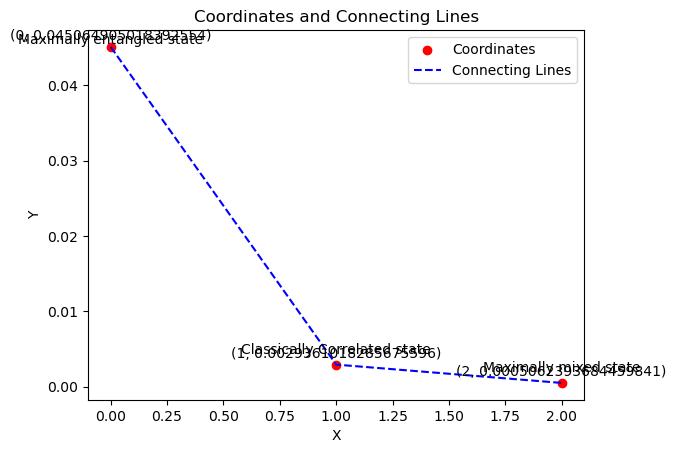

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define three coordinates (x, y)
x_coords = [0, 1, 2]
y_coords = [eucldistance1, eucldistance2, eucldistance3]

# Create a scatter plot for the coordinates
plt.scatter(x_coords, y_coords, color='red', label='Coordinates')

# Connect the coordinates with lines
plt.plot(x_coords, y_coords, 'b--', label='Connecting Lines')

# Calculate vertical distances
vertical_distances = np.diff(y_coords)
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.annotate(f"({x}, {y})", (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.annotate("Maximally entangled state", (0, eucldistance1-0.0005), textcoords="offset points", xytext=(0, 5), ha='center')
plt.annotate("Classically Correlated state", (1, eucldistance2+0.0005), textcoords="offset points", xytext=(0, 5), ha='center')
plt.annotate("Maximally mixed state", (2, eucldistance3+0.0005), textcoords="offset points", xytext=(0, 5), ha='center')

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordinates and Connecting Lines')

# Show the plot
plt.legend()
plt.show()

In [32]:
'''
Classically correlated state: Target & Model Distributions and Distances
'''
'''
Trial 1
(array([0.        , 0.        , 0.0254145 , 0.04425747, 0.        ,
        0.        , 0.02766401, 0.02766401, 0.04425747, 0.02766401,
        0.        , 0.        , 0.0254145 , 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02766401, 0.02766401,
        0.        , 0.        , 0.04425747, 0.0254145 , 0.02766401,
        0.0254145 , 0.        , 0.        , 0.02766401, 0.04425747,
        0.        , 0.        , 0.02766401, 0.04425747, 0.        ,
        0.        , 0.0254145 , 0.02766401, 0.        , 0.        ,
        0.        , 0.        , 0.04981484, 0.02506172, 0.        ,
        0.        , 0.02506172, 0.02506172, 0.02766401, 0.0254145 ,
        0.        , 0.        , 0.04425747, 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02506172, 0.02506172,
        0.        , 0.        , 0.02506172, 0.04981484]),
 array([4.84490338e-05, 5.72109311e-05, 2.56454833e-02, 4.44461517e-02,
        1.07693304e-05, 1.79446979e-05, 2.73190681e-02, 2.74932031e-02,
        4.30544205e-02, 2.71252394e-02, 4.93859479e-05, 4.71056737e-05,
        2.54249349e-02, 2.77214795e-02, 9.61739279e-05, 8.17579494e-05,
        9.94515722e-05, 2.41863905e-04, 2.79283766e-02, 2.82583814e-02,
        3.84679406e-05, 1.26851461e-04, 4.36287262e-02, 2.54307762e-02,
        2.72104256e-02, 2.53467448e-02, 7.03848345e-05, 6.05371388e-05,
        2.80454010e-02, 4.49285433e-02, 1.37134222e-04, 8.92459138e-05,
        2.77425703e-02, 4.45064977e-02, 1.11978705e-04, 6.95827766e-05,
        2.51188483e-02, 2.77163126e-02, 4.43161662e-05, 3.35680088e-05,
        6.75419797e-05, 1.26445026e-04, 4.82808463e-02, 2.40610372e-02,
        1.11031513e-04, 1.83923723e-04, 2.47710161e-02, 2.50385329e-02,
        2.76903547e-02, 2.57511791e-02, 1.39950309e-04, 1.29779495e-04,
        4.31431457e-02, 2.73792148e-02, 4.30807886e-05, 3.27888592e-05,
        1.53943965e-05, 1.54507434e-05, 2.51070857e-02, 2.52162702e-02,
        3.56931014e-05, 5.42204616e-05, 2.58890055e-02, 5.10838367e-02],
       dtype=float32))
0.007946310341342175 0.003352266536626516
'''
'''
Trial 2
(array([0.        , 0.        , 0.0254145 , 0.04425747, 0.        ,
        0.        , 0.02766401, 0.02766401, 0.04425747, 0.02766401,
        0.        , 0.        , 0.0254145 , 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02766401, 0.02766401,
        0.        , 0.        , 0.04425747, 0.0254145 , 0.02766401,
        0.0254145 , 0.        , 0.        , 0.02766401, 0.04425747,
        0.        , 0.        , 0.02766401, 0.04425747, 0.        ,
        0.        , 0.0254145 , 0.02766401, 0.        , 0.        ,
        0.        , 0.        , 0.04981484, 0.02506172, 0.        ,
        0.        , 0.02506172, 0.02506172, 0.02766401, 0.0254145 ,
        0.        , 0.        , 0.04425747, 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02506172, 0.02506172,
        0.        , 0.        , 0.02506172, 0.04981484]),
 array([1.42214820e-04, 5.78737672e-05, 2.58442033e-02, 4.46714275e-02,
        2.93405537e-05, 3.69935733e-05, 2.76480801e-02, 2.75118183e-02,
        4.47447412e-02, 2.79420242e-02, 3.67641660e-05, 1.69105624e-04,
        2.52885055e-02, 2.77800225e-02, 7.11571874e-06, 5.00256720e-05,
        1.30243672e-04, 7.89643163e-05, 2.76167523e-02, 2.73887981e-02,
        4.35935872e-05, 7.62426134e-05, 4.36780304e-02, 2.48843953e-02,
        2.73712445e-02, 2.51205098e-02, 6.15017052e-05, 1.47101455e-04,
        2.71253716e-02, 4.39968258e-02, 1.47157025e-05, 1.02738391e-04,
        2.70987209e-02, 4.51673381e-02, 1.45658792e-04, 3.57110657e-05,
        2.48433854e-02, 2.76899729e-02, 5.64604197e-05, 1.35585860e-05,
        4.27509549e-05, 1.25623294e-04, 4.98820059e-02, 2.47149579e-02,
        2.21335631e-05, 3.47519199e-05, 2.54813712e-02, 2.46863067e-02,
        2.75781099e-02, 2.59637646e-02, 1.92193838e-04, 7.07342406e-05,
        4.34141569e-02, 2.78628953e-02, 1.06300467e-04, 3.21507105e-05,
        1.02582293e-04, 1.56290844e-04, 2.52075829e-02, 2.47593597e-02,
        4.32064044e-05, 5.99535924e-05, 2.54815705e-02, 4.91126068e-02],
       dtype=float32))
0.0068953194852005295 0.0024437000709711877
'''
'''
Trial 3
(array([0.        , 0.        , 0.0254145 , 0.04425747, 0.        ,
        0.        , 0.02766401, 0.02766401, 0.04425747, 0.02766401,
        0.        , 0.        , 0.0254145 , 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02766401, 0.02766401,
        0.        , 0.        , 0.04425747, 0.0254145 , 0.02766401,
        0.0254145 , 0.        , 0.        , 0.02766401, 0.04425747,
        0.        , 0.        , 0.02766401, 0.04425747, 0.        ,
        0.        , 0.0254145 , 0.02766401, 0.        , 0.        ,
        0.        , 0.        , 0.04981484, 0.02506172, 0.        ,
        0.        , 0.02506172, 0.02506172, 0.02766401, 0.0254145 ,
        0.        , 0.        , 0.04425747, 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02506172, 0.02506172,
        0.        , 0.        , 0.02506172, 0.04981484]),
 array([4.4617158e-05, 6.6751119e-05, 2.5986431e-02, 4.3855973e-02,
        1.3333003e-04, 1.2321238e-04, 2.7879482e-02, 2.7385147e-02,
        4.3994363e-02, 2.8256658e-02, 7.2720934e-05, 6.4606800e-05,
        2.5113298e-02, 2.7706960e-02, 5.1983105e-05, 1.5521437e-04,
        1.2109500e-04, 2.8200939e-04, 2.7630297e-02, 2.7605899e-02,
        5.0272414e-04, 7.0703647e-04, 4.3558393e-02, 2.5224460e-02,
        2.7361823e-02, 2.5598573e-02, 3.1021779e-04, 1.1322278e-04,
        2.7490698e-02, 4.3436434e-02, 6.7180017e-04, 5.5705133e-04,
        2.8164975e-02, 4.5227896e-02, 8.3568259e-05, 2.7316170e-05,
        2.4982521e-02, 2.7691817e-02, 3.6111558e-04, 1.4683147e-04,
        1.3396126e-05, 6.1113111e-05, 5.0132912e-02, 2.4930108e-02,
        1.4547564e-04, 2.6534765e-04, 2.5256401e-02, 2.5080392e-02,
        2.7239805e-02, 2.5281772e-02, 1.0261127e-04, 9.8130047e-05,
        4.2270832e-02, 2.6886338e-02, 5.4756470e-04, 6.0771691e-04,
        3.7892773e-05, 6.9490110e-05, 2.4449805e-02, 2.4568224e-02,
        5.6357938e-04, 5.6591642e-04, 2.4178389e-02, 4.7873300e-02],
       dtype=float32))
0.01132481394009811 0.004161697478700918
'''
'''
Trial 4
(array([0.        , 0.        , 0.0254145 , 0.04425747, 0.        ,
        0.        , 0.02766401, 0.02766401, 0.04425747, 0.02766401,
        0.        , 0.        , 0.0254145 , 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02766401, 0.02766401,
        0.        , 0.        , 0.04425747, 0.0254145 , 0.02766401,
        0.0254145 , 0.        , 0.        , 0.02766401, 0.04425747,
        0.        , 0.        , 0.02766401, 0.04425747, 0.        ,
        0.        , 0.0254145 , 0.02766401, 0.        , 0.        ,
        0.        , 0.        , 0.04981484, 0.02506172, 0.        ,
        0.        , 0.02506172, 0.02506172, 0.02766401, 0.0254145 ,
        0.        , 0.        , 0.04425747, 0.02766401, 0.        ,
        0.        , 0.        , 0.        , 0.02506172, 0.02506172,
        0.        , 0.        , 0.02506172, 0.04981484]),
 array([4.3291246e-05, 6.7459579e-05, 2.5468512e-02, 4.4318847e-02,
        1.7697465e-05, 3.7659473e-05, 2.7593184e-02, 2.7523722e-02,
        4.3542236e-02, 2.7766060e-02, 5.7961108e-05, 4.0914983e-05,
        2.5091596e-02, 2.7654955e-02, 4.9411974e-05, 2.0746123e-05,
        5.0919083e-05, 3.0259156e-05, 2.7493296e-02, 2.8467095e-02,
        3.8688453e-05, 4.8583035e-05, 4.3803282e-02, 2.5637059e-02,
        2.7513403e-02, 2.5622396e-02, 1.9128282e-05, 6.1943734e-05,
        2.7310511e-02, 4.3883309e-02, 3.2387932e-05, 5.4961500e-05,
        2.7485104e-02, 4.4434454e-02, 4.1224099e-05, 5.1369490e-05,
        2.5293067e-02, 2.7613735e-02, 2.3628147e-05, 4.0219049e-05,
        3.5834259e-05, 5.7199926e-05, 4.9474288e-02, 2.5221333e-02,
        3.5069388e-05, 3.6836271e-05, 2.5444463e-02, 2.5066147e-02,
        2.7551157e-02, 2.5778193e-02, 4.8485355e-05, 3.3664295e-05,
        4.4153079e-02, 2.7824279e-02, 3.8158516e-05, 3.4798701e-05,
        2.7265773e-05, 4.7712721e-05, 2.4732349e-02, 2.5378272e-02,
        4.1624564e-05, 4.1768704e-05, 2.4995796e-02, 4.9552575e-02],
       dtype=float32))
0.006647017514977489 0.0016758471049156411
'''

'''
Maximally entangled state: 
'''
'''
Trial 1
(array([0.        , 0.        , 0.05018847, 0.0194835 , 0.        ,
        0.        , 0.00289004, 0.05243798, 0.06903144, 0.00289004,
        0.        , 0.        , 0.00064053, 0.05243798, 0.        ,
        0.        , 0.        , 0.        , 0.00289004, 0.05243798,
        0.        , 0.        , 0.06903144, 0.00064053, 0.00289004,
        0.05018847, 0.        , 0.        , 0.05243798, 0.0194835 ,
        0.        , 0.        , 0.05243798, 0.0194835 , 0.        ,
        0.        , 0.00064053, 0.05243798, 0.        , 0.        ,
        0.        , 0.        , 0.07225838, 0.00261818, 0.        ,
        0.        , 0.00261818, 0.04750525, 0.00289004, 0.05018847,
        0.        , 0.        , 0.06903144, 0.00289004, 0.        ,
        0.        , 0.        , 0.        , 0.00261818, 0.04750525,
        0.        , 0.        , 0.04750525, 0.02737131]),
 array([4.6319194e-05, 1.2381580e-04, 5.3220548e-02, 1.9708041e-02,
        3.3621502e-04, 1.9065193e-04, 3.0267404e-03, 5.2712817e-02,
        7.0652477e-02, 2.6767151e-03, 2.9534183e-05, 4.1333458e-04,
        7.5435929e-04, 5.3227201e-02, 8.0199512e-05, 2.1427998e-04,
        1.3914741e-05, 1.2434707e-05, 2.3359340e-03, 6.0332142e-02,
        1.9059464e-06, 2.9749108e-06, 6.4259894e-02, 2.1233696e-02,
        2.4961660e-02, 4.8521582e-02, 1.7289362e-06, 4.5409971e-03,
        6.0769375e-02, 1.8630492e-02, 1.5611316e-06, 3.7832957e-04,
        5.0105475e-02, 3.5116538e-02, 4.8448288e-07, 2.3463235e-06,
        5.1878212e-04, 2.6860430e-06, 1.0443684e-06, 5.0074095e-07,
        8.7628416e-07, 7.6017473e-05, 2.1308855e-07, 2.6439833e-03,
        1.3754473e-06, 4.4322070e-03, 3.9197255e-02, 4.8390698e-02,
        3.0389109e-03, 5.2043106e-02, 6.9514586e-04, 2.2434523e-04,
        6.8457380e-02, 3.1002918e-03, 5.7576784e-07, 4.1780073e-05,
        1.5201385e-04, 6.9322577e-04, 3.2481754e-03, 4.6144135e-02,
        6.9876228e-06, 4.9439748e-04, 5.1307816e-02, 2.6437622e-02],
       dtype=float32))
0.13806960375567867 0.10346526504136046
'''

'''
Maximally mixed state: 
'''
'''
Trial 1
(array([0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625, 0.015625, 0.015625]),
 array([0.01562816, 0.01562285, 0.01562028, 0.01562171, 0.01562792,
        0.01562256, 0.01561995, 0.01562145, 0.01562792, 0.01562249,
        0.01561993, 0.01562135, 0.01562714, 0.01562208, 0.01561955,
        0.01562104, 0.01563374, 0.01562778, 0.01562644, 0.01562744,
        0.01563364, 0.01562753, 0.01562615, 0.0156272 , 0.01563359,
        0.01562754, 0.01562609, 0.01562733, 0.01563288, 0.01562705,
        0.0156255 , 0.01562693, 0.01563203, 0.01562661, 0.01562491,
        0.01562607, 0.01563189, 0.01562633, 0.01562458, 0.01562581,
        0.01563179, 0.01562632, 0.01562465, 0.01562591, 0.01563101,
        0.01562589, 0.01562406, 0.0156255 , 0.01562732, 0.01562336,
        0.01562181, 0.0156229 , 0.01562715, 0.0156231 , 0.01562154,
        0.01562267, 0.01562724, 0.01562297, 0.01562156, 0.01562255,
        0.01562667, 0.01562295, 0.01562141, 0.01562237], dtype=float32))
9.444961324334145e-05 2.9006170497065237e-05
'''

'\nTrial 1\n(array([0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,\n        0.015625, 0.015625, 0.015625, 0.015625]),\n array([0.01562816, 0.01562285, 0.01562028, 0.01562171, 0.01562792,\n        0.01562256, 0.01561995, 0.01562145, 0.01562792, 0.01562249,\n        0.01561993, 0.01562135, 0.01562714, 0.01562208, 0.01561955,\n        0.01562104, 0.01563374, 0.015627

In [33]:
tf.keras.backend.clear_session()